<a href="https://colab.research.google.com/github/RedEgnival/sem-4/blob/main/I069_ML_lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rusheel Sharma
# I069
# ML Lab 4

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Apply Simple Linear Regression

Q1. Define 2 numpy arrays x = [5,15,25,35,45,55]
y = [11,16,18,30,22,38] which represtest BMI and Cholestrol and plot scatter plot.

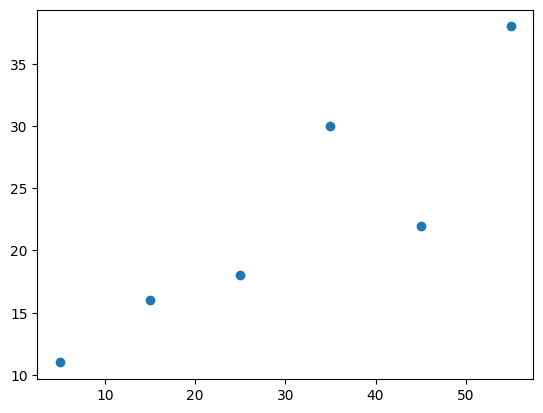

In [ ]:
x = np.array([5,15,25,35,45,55])
y = np.array([11,16,18,30,22,38])
plt.scatter(x,y)

Q2. Calculate the b0 and b1

In [ ]:
n=len(x)
xy=np.sum(x*y)
x2=np.sum(x**2)
xs=np.sum(x)
ys=np.sum(y)
b1 = ((n*xy) - (xs*ys)) / (n*x2 - ((np.sum(x))**2))
b0 = np.mean(y) - (b1*np.mean(x))
print(b0,b1)

8.357142857142858 0.4714285714285714


Q3. Predict y for x = 27 and plot the regression line.

21.085714285714285


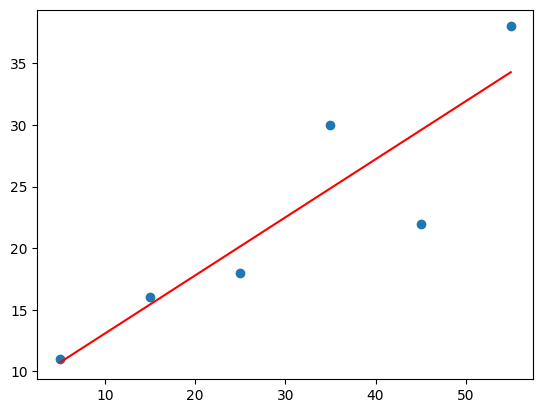

In [ ]:
xi=27
y_pred = b0 + b1*xi
print(y_pred)

y_cap=b0+b1*x
plt.scatter(x,y)
plt.plot(x,y_cap,color='red')

Q4. Calculate the coefficient of determination

In [ ]:
sse = np.sum((y-y_cap)**2)
ssr = np.sum((y_cap-np.mean(y))**2)
sst = ssr+sse
print(sse,ssr,sst)
r2 = ssr/sst
print(r2)

102.5714285714286 388.92857142857144 491.50000000000006
0.7913094027030955


Task 2 : Redo above linear regression using library

Q5.	Import LinearRegression from SKlearn.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

Q6. 	Reshape x to make it two dimensional array

In [ ]:
xr = x.reshape(-1,1)
yr = y.reshape(-1,1)

Q7. Create a model for linear regression

In [ ]:
model = LinearRegression().fit(xr,yr)


In [ ]:
b0r = model.intercept_
b1r = model.coef_
print(b0r,b1r)


[8.35714286] [[0.47142857]]


In [ ]:
r2r = model.score(xr,yr)
r2r

0.7913094027030955

0.7913094027030955

In [ ]:
model.predict([[27]])

array([[21.08571429]])

Task 3

Q8. Import salary.csv into your notebooks.

In [ ]:
pd = pd.read_csv("/content/Salary_Data.csv")
pd

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


Q9. Explore the dataset using head and describe.

In [ ]:
pd.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
pd.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


Q10. Fit model

In [ ]:
nxr = pd["YearsExperience"].values.reshape(-1,1)
nyr = pd["Salary"].values.reshape(-1,1)

In [ ]:
model2 = LinearRegression().fit(nxr,nyr)

In [ ]:
nb0 = model2.intercept_
nb1 = model2.coef_
print(nb0,nb1)

[25792.20019867] [[9449.96232146]]


In [ ]:
r2n = model2.score(nxr,nyr)
r2n

0.9569566641435086

Q11. Plot a scatter plot

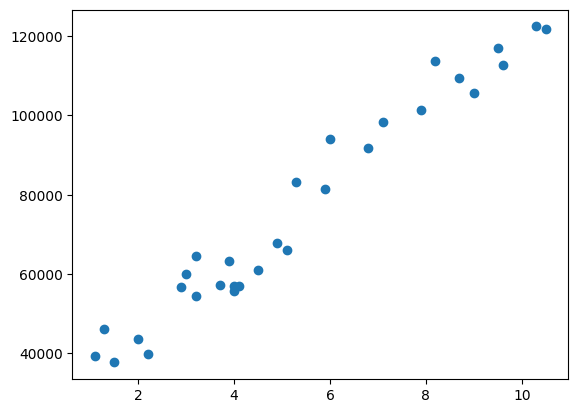

In [ ]:
plt.scatter(nxr,nyr)

Q12. Cross validation

In [ ]:
from sklearn.model_selection import train_test_split
xtr, xte, ytr, yte = train_test_split(nxr,nyr, test_size=0.2, random_state=0)

In [ ]:
model3 = LinearRegression().fit(xtr,ytr)
trb0 = model3.intercept_
trb1 = model3.coef_
print(trb0,trb1)
r2tr = model3.score(xtr,ytr)
r2tr

[26780.09915063] [[9312.57512673]]


0.9411949620562126

In [ ]:
model4 = LinearRegression().fit(xte,yte)
teb0 = model4.intercept_
teb1 = model4.coef_
print(trb0,trb1)
r2te = model4.score(xte,yte)
r2te

[26780.09915063] [[9312.57512673]]


0.9934483090292765

Q13. Deploy model using streamlit

In [ ]:
import pickle

with open("classifier.pkl", "wb") as model_file:
    pickle.dump(model, model_file)



In [ ]:
with open("classifier.pkl", "rb") as model_file:
    model = pickle.load(model_file)

st.title("Iris Species Classifier")
st.write("Enter the flower measurements to classify the species.")

sepal_length = st.slider("Sepal Length (cm)", min_value=4.0, max_value=8.0, step=0.1)
sepal_width = st.slider("Sepal Width (cm)", min_value=2.0, max_value=5.0, step=0.1)
petal_length = st.slider("Petal Length (cm)", min_value=1.0, max_value=7.0, step=0.1)
petal_width = st.slider("Petal Width (cm)", min_value=0.1, max_value=2.5, step=0.1)

if st.button("Predict"):
    features = np.array([[sepal_length, sepal_width, petal_length, petal_width]])
    prediction = model.predict(features)
    st.write(f"Predicted Iris Species: {prediction[0]}")

NameError: name 'st' is not defined

In [ ]:
streamlit run app.py